# Averaged planes

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 #'/ccs/proj/cfd162/lcheung/amr-wind-frontend.lcc/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/'
                ]
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

import matplotlib.pyplot as plt
# Make all plots inline 
%matplotlib inline

In [2]:
import postproengine as ppeng	
import ruamel.yaml    
yaml = ruamel.yaml.YAML(typ='rt')
Loader= yaml.load
loaderkwargs = {}
dumperkwargs = {}

In [3]:
ALM_BD_dir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/rundir_ALM_beamdyn'
ALM_ED_dir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/rundir_ALM_elastodyn'
FSI_ED_dir='/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/twoturbine_iea15mw_lowTI_lowWS_7x2_prod.flight'
time='{time-17500:0.2f}'

In [24]:
yamlstring="""
globalattributes:
  verbose: True
  #udfmodules:
  #- testmod.py
  executeorder:
  - workflow1

tavg: &tavg [17590, 17660]

instantplotstuff: &iplotanchor
  plotfunc: "lambda db: np.sqrt(db['velocityx_avg']**2 + db['velocityy_avg']**2)"
  xscalefunc: 'lambda x: (x-2280.0)/240.0'
  yscalefunc: 'lambda y: (y-1000.0)/240.0'
  fontsize: 8
  xlabel: 'x/D'
  ylabel: 'y/D'
  clevels: 'np.linspace(0, 10, 101)'
  iplane: 1

instantplotstuffXZ: &XZiplotanchor
  plotfunc: "lambda db: np.sqrt(db['velocityx_avg']**2 + db['velocityy_avg']**2)"
  xscalefunc: 'lambda x: (x-2280.0)/240.0'
  yscalefunc: 'lambda y: (y)/240.0'
  fontsize: 8
  xaxis: x
  yaxis: z
  xlabel: 'x/D'
  ylabel: 'z/D'
  clevels: 'np.linspace(0, 10, 101)'
  axisscale: 
  
workflow1:
  avgplanes:
  # ---- XY ----
  - name: ALM_ED_instantXY
    ncfile: {ALM_ED_dir}/post_processing/XY_*.nc
    tavg: *tavg 
    contourplot:
      << :   *iplotanchor
      title: 'ALM Elastodyn'
      figname: fig1
      axesnumfunc: 'lambda i: 0'
  - name: ALM_BD_instantXY
    ncfile: {ALM_BD_dir}/post_processing/XY_*.nc
    tavg: *tavg 
    contourplot:
      << :   *iplotanchor
      title: 'ALM Beamdyn'
      figname: fig1
      axesnumfunc: 'lambda i: 2'
  - name: FSI_ED_instantXY
    ncfile: {FSI_ED_dir}/post_processing/XY_*.nc
    tavg: *tavg 
    contourplot:
      << :   *iplotanchor
      title: 'FSI Elastodyn'
      figname: fig1
      axesnumfunc: 'lambda i: 4'

  # ---- XZ ----
  - name: ALM_ED_instantXZ
    ncfile: {ALM_ED_dir}/post_processing/XZ_*.nc
    tavg: *tavg 
    contourplot:
      << :   *XZiplotanchor
      title: 'ALM Elastodyn'
      figname: fig1
      axesnumfunc: 'lambda i: 1'
  - name: ALM_BD_instantXZ
    ncfile: {ALM_BD_dir}/post_processing/XZ_*.nc
    tavg: *tavg 
    contourplot:
      << :   *XZiplotanchor
      title: 'ALM Beamdyn'
      figname: fig1
      axesnumfunc: 'lambda i: 3'
  - name: FSI_ED_instantXZ
    ncfile: {FSI_ED_dir}/post_processing/XZ_*.nc
    tavg: *tavg 
    contourplot:
      << :   *XZiplotanchor
      title: 'FSI Elastodyn'
      figname: fig1
      axesnumfunc: 'lambda i: 5'
"""
f = io.StringIO(yamlstring.format(**vars()))
yamldict = Loader(f, **loaderkwargs)

Initialized avgplanes
Running avgplanes
/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/rundir_ALM_elastodyn/post_processing/XY_35000.nc 140
[============================================================] 100.0% 
Ncount = 140

Initialized contourplot inside avgplanes
Executing contourplot
/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/rundir_ALM_beamdyn/post_processing/XY_35000.nc 0

/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/rundir_ALM_beamdyn/post_processing/XY_41500.nc 55
[============================================================] 100.0% 
/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/LowWS_LowTI/ABL_FSI_7x2/rundir_ALM_beamdyn/post_processing/XY_48000.nc 319
[============================================================] 99.7% 
/lustre/orion/cfd162/world-shared/lcheung/ALCC_Frontier_WindFarm/farmruns/L

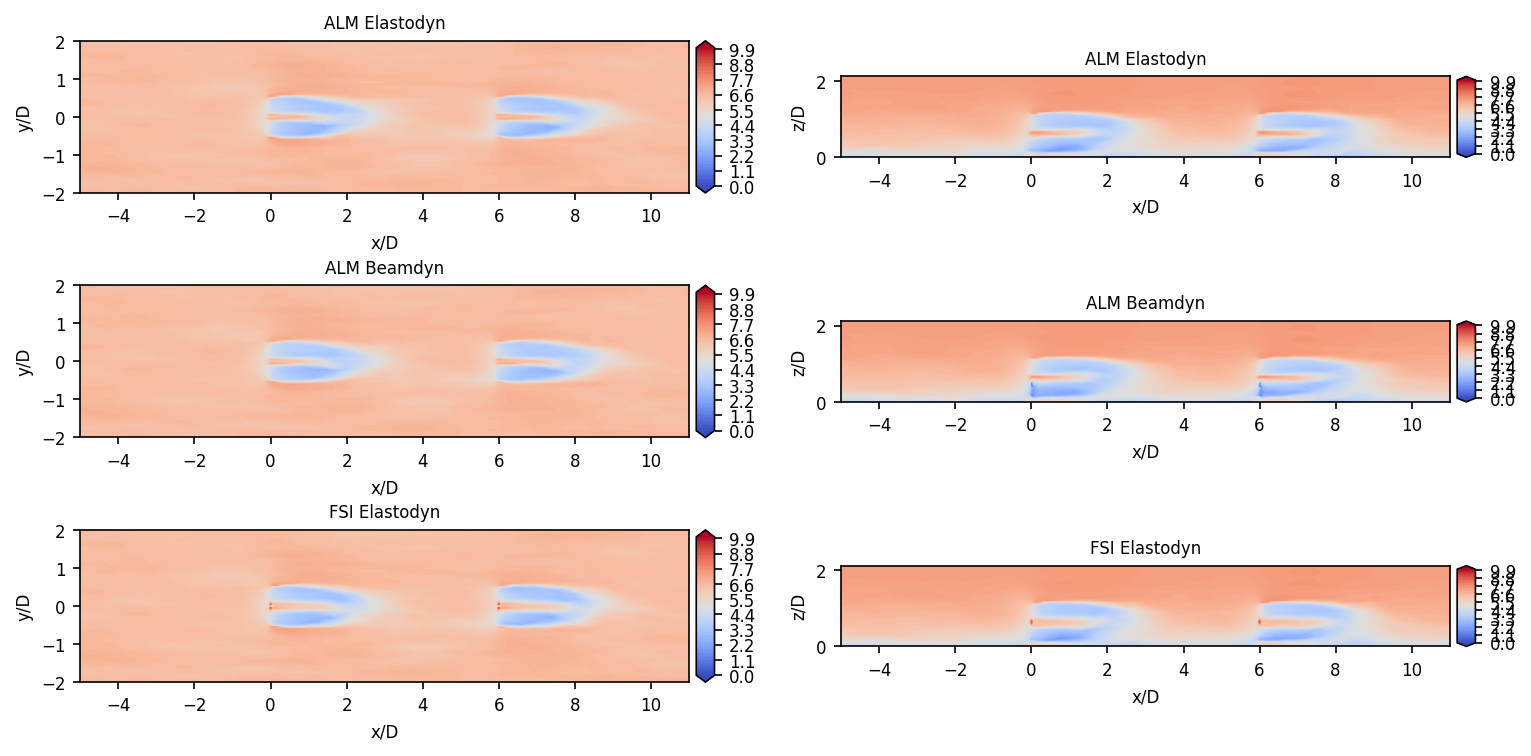

In [25]:
fig, axs = plt.subplots(3,2, figsize=(12,6), num="fig1", dpi=150)
ppeng.driver(yamldict)